In [23]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier

In [4]:
df=pd.read_csv('cardio_data_cleaned(IQR).csv')

In [5]:
df.head()

,age,gender,cholesterol,gluc,smoke,alco,active,cardio,BMI,MAP
0,3,2,1,1,0,0,1,0,2,2
1,4,1,3,1,0,0,1,1,3,4
2,3,1,3,1,0,0,0,1,2,2
3,2,2,1,1,0,0,1,1,3,5
4,5,1,2,2,0,0,0,0,3,2


In [6]:
X=df.drop(columns=['cardio',])
y=df['cardio']

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
mlp = MLPClassifier()
mlp.fit(X_train, y_train)
y_pred = mlp.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
print(f"Accuracy: {accuracy}")
print(f"f1 score: {f1_score(y_test, y_pred)}")
print(f"precision score: {precision_score(y_test, y_pred)}")
print(f"recall score: {recall_score(y_test, y_pred)}")
print(f"aroc_auc:{roc_auc}")

Accuracy: 0.7223422126229901
f1 score: 0.723492392256831
precision score: 0.7098639987494137
recall score: 0.7376543209876543
aroc_auc:0.7891401317261575


In [10]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.73      0.72      0.73      6345
           1       0.71      0.73      0.72      6156

    accuracy                           0.72     12501
   macro avg       0.72      0.72      0.72     12501
weighted avg       0.72      0.72      0.72     12501



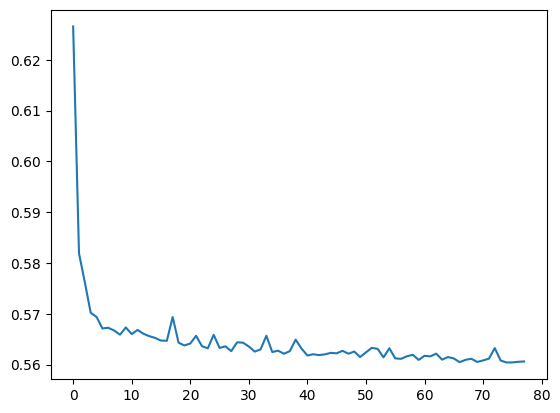

In [11]:
plt.plot(mlp.loss_curve_)

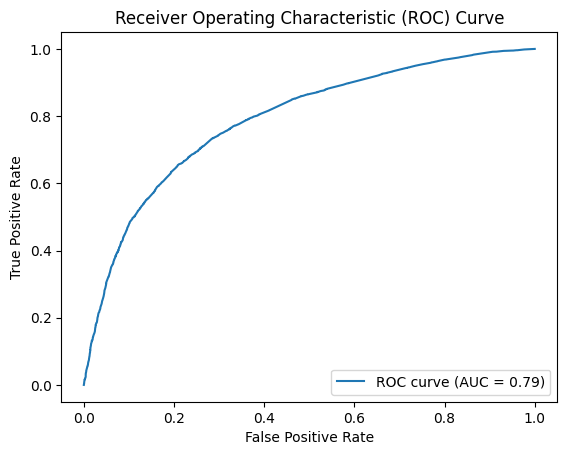

In [35]:
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [26]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'hidden_layer_sizes': [(50,100), (100,), (50, 50)],
    'activation': ['tanh', 'relu'],
    'solver': ['adam', 'sgd'],
    'learning_rate': ['constant', 'adaptive'],
    'alpha': [0.0001, 0.001, 0.01]
}
mlp = MLPClassifier()
grid_search = GridSearchCV(estimator=mlp, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)
best_model = grid_search.best_estimator_
test_accuracy = best_model.score(X_test, y_test)
y_pred = best_model.predict(X_test)
print("Test Accuracy:", test_accuracy)

Best Parameters: {'activation': 'tanh', 'alpha': 0.01, 'hidden_layer_sizes': (50, 50), 'learning_rate': 'constant', 'solver': 'adam'}
Best Cross-Validation Accuracy: 0.7159257254274574
Test Accuracy: 0.7236221102311815


In [32]:
y_pred_proba = best_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(f"f1 score: {f1_score(y_test, y_pred)}")
print(f"precision score: {precision_score(y_test, y_pred)}")
print(f"recall score: {recall_score(y_test, y_pred)}")
print(f"aroc_auc:{roc_auc}")

Accuracy: 0.7223422126229901
f1 score: 0.723492392256831
precision score: 0.7098639987494137
recall score: 0.7376543209876543
aroc_auc:0.7891401317261575


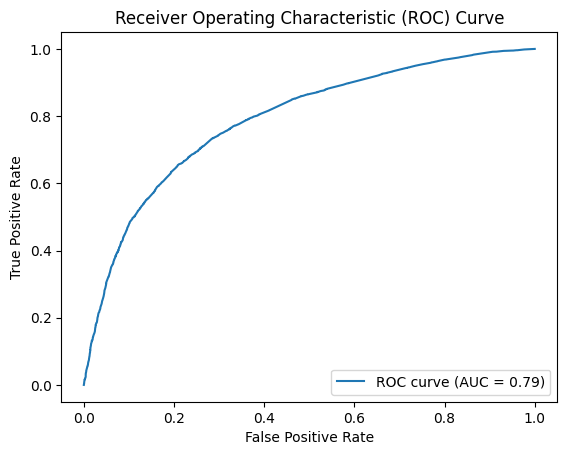

In [37]:
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [12]:
!pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 9.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=5d14dfab138ef49142b7505d93de5694388cf52d6ff4104a38956518256afcd0
  Stored in directory: /root/.cache/pip/wheels/85/fa/a3/9c2d44c9f3cd77cf4e533b58900b2bf4487f2a17e8ec212a3d
Successfully built lime


In [15]:
import lime
import lime.lime_tabular
explainer = lime.lime_tabular.LimeTabularExplainer(X_train.values, feature_names=X.columns, class_names=['No Cardio', 'Cardio'], mode='classification')
exp = explainer.explain_instance(X_test.iloc[0].values, mlp.predict_proba, num_features=9)
exp.show_in_notebook()

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


<BarContainer object of 9 artists>

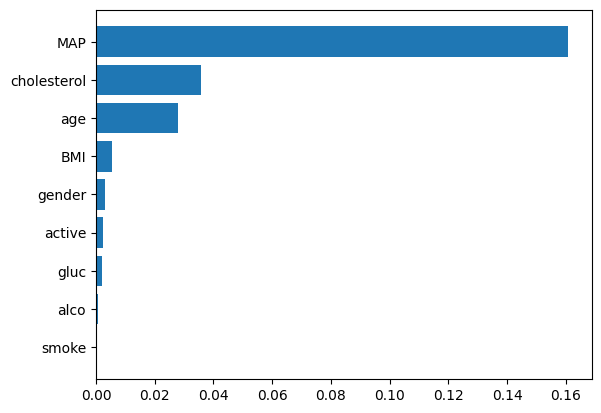

In [14]:
from sklearn.inspection import permutation_importance
result = permutation_importance(mlp, X_test, y_test, n_repeats=30, random_state=737)
sorted_idx = result.importances_mean.argsort()
plt.barh(X.columns[sorted_idx], result.importances_mean[sorted_idx])

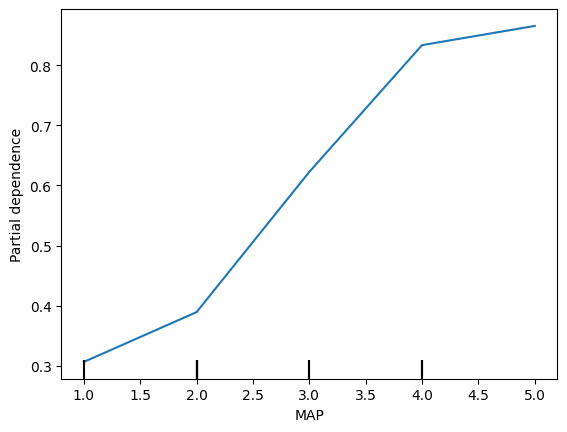

In [14]:
from sklearn.inspection import PartialDependenceDisplay
feature = [8]
target_class = 1
PartialDependenceDisplay.from_estimator(mlp, X_test, features=feature, target=target_class)
plt.show()

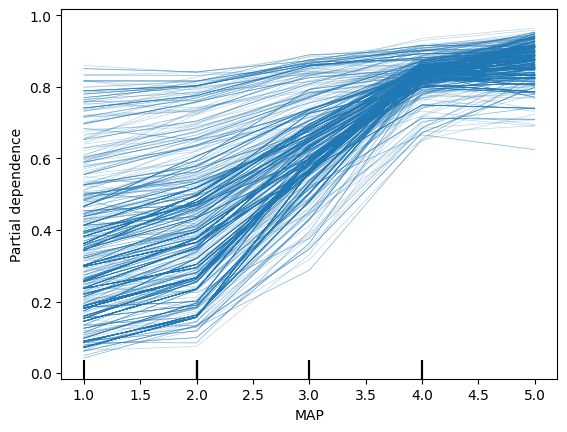

In [15]:
PartialDependenceDisplay.from_estimator(mlp, X_test, features=feature, target=target_class, kind='individual')
plt.show()

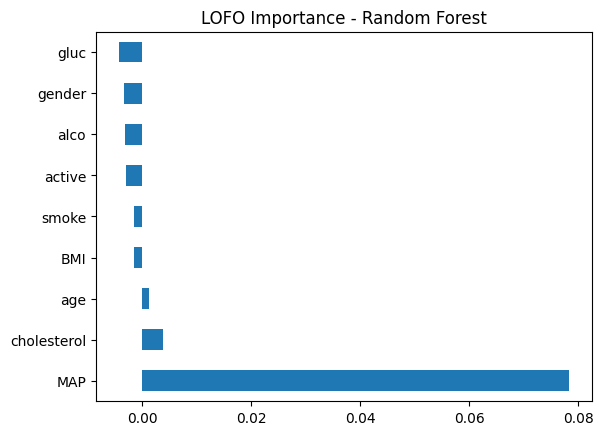

In [16]:
from sklearn.model_selection import cross_val_score
baseline = cross_val_score(mlp, X_train, y_train, cv=5).mean()
lofo_scores = {}
for col in X.columns:
    X_lofo = X_train.drop(columns=[col])
    score = cross_val_score(mlp, X_lofo, y_train, cv=5).mean()
    lofo_scores[col] = baseline - score

lofo_df = pd.Series(lofo_scores).sort_values(ascending=False)
lofo_df.plot(kind='barh')
plt.title("LOFO Importance")
plt.show()